### Data visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests                                   
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import re 

In [2]:
df5=pd.read_csv('practo_docInformation.csv')

In [3]:
df5

,Unnamed: 0,Doctor_Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations
0,2,Dr. V.Shirisha,Dermatologist,17,Shirisha Skin & Hair Clinic,Kondapur,Hyderabad,650,93.0
1,3,Dr. Soumya Podduturi,Dermatologist,13,Oliva Skin & Hair Clinic,Secunderabad,Hyderabad,600,96.0
2,4,Dr. T N Rekha Singh,Dermatologist,19,Oliva Skin & Hair Clinic,Secunderabad,Hyderabad,600,99.0
3,5,Dr. Mallikarjun,Dermatologist,10,DIVI Speciality Clinics,Chanda Nagar,Hyderabad,400,98.0
4,6,Dr. Y Nikhil Kumar Reddy,Dermatologist,12,IRA Clinic,Suchitra Circle,Hyderabad,500,93.0
...,...,...,...,...,...,...,...,...,...
877,2455,Dr. Vinod Prem Anand,General Physician,23,Fortis Malar Hospital,Adyar,Chennai,700,100.0
878,2456,Dr. Pravin K Aggarwal,General Physician,42,Fortis Malar Hospital,Adyar,Chennai,700,86.0
879,2457,Dr. Poonam Verma,Ayurveda,27,Bliss Medicare Centre,Vadapalani,Chennai,600,96.0
880,2467,Dr. Vaseem Choudhary,Homoeopath,14,Homeo Care Clinic,Hadapsar,Pune,300,93.0


In [4]:
df5.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
df5

,Doctor_Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations
0,Dr. V.Shirisha,Dermatologist,17,Shirisha Skin & Hair Clinic,Kondapur,Hyderabad,650,93.0
1,Dr. Soumya Podduturi,Dermatologist,13,Oliva Skin & Hair Clinic,Secunderabad,Hyderabad,600,96.0
2,Dr. T N Rekha Singh,Dermatologist,19,Oliva Skin & Hair Clinic,Secunderabad,Hyderabad,600,99.0
3,Dr. Mallikarjun,Dermatologist,10,DIVI Speciality Clinics,Chanda Nagar,Hyderabad,400,98.0
4,Dr. Y Nikhil Kumar Reddy,Dermatologist,12,IRA Clinic,Suchitra Circle,Hyderabad,500,93.0
...,...,...,...,...,...,...,...,...
877,Dr. Vinod Prem Anand,General Physician,23,Fortis Malar Hospital,Adyar,Chennai,700,100.0
878,Dr. Pravin K Aggarwal,General Physician,42,Fortis Malar Hospital,Adyar,Chennai,700,86.0
879,Dr. Poonam Verma,Ayurveda,27,Bliss Medicare Centre,Vadapalani,Chennai,600,96.0
880,Dr. Vaseem Choudhary,Homoeopath,14,Homeo Care Clinic,Hadapsar,Pune,300,93.0


In [6]:
df5["Specialization"].value_counts()

Dermatologist                237
Dentist                      229
Gynecologist/Obstetrician    175
General Physician            118
Ayurveda                      77
Homoeopath                    24
Ear-Nose-Throat (ENT)         22
Name: Specialization, dtype: int64

In [7]:
df5["City"].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Chennai', 'Pune', 'Delhi'],
      dtype=object)

In [8]:
df5["Consultation_Fees"].max()

3000

In [9]:
df5["Consultation_Fees"].min()

0

In [10]:
df5["Consultation_Fees"].mean()

711.4297052154195

In [11]:
df5.groupby(['Specialization','City'])['Consultation_Fees'].aggregate(['min','max','mean'])

min   max         mean
Specialization            City                              
Ayurveda                  Bangalore   250   750   442.857143
                          Chennai     300   750   557.692308
                          Delhi        50  1500   790.909091
                          Hyderabad   299   500   449.900000
                          Mumbai      400  2000   976.923077
                          Pune        200   500   387.500000
Dentist                   Bangalore   200  1000   497.500000
                          Chennai     150  1800   502.500000
                          Delhi       400  1500   597.500000
                          Hyderabad   300  1000   506.250000
                          Mumbai      200  1000   537.500000
                          Pune        150   500   452.702703
Dermatologist             Bangalore   500  2000   719.428571
                          Chennai     300  1000   678.947368
                          Delhi       600  1700  1102.380952
                          Hyderabad   400  1200   651.162791
                          Mumbai      800  3000  1170.454545
                          Pune        500   900   645.714286
Ear-Nose-Throat (ENT)     Bangalore   850  1000   900.000000
                          Delhi       700  1500  1130.000000
                          Hyderabad   800   800   800.000000
                          Mumbai     1000  1300  1166.666667
                          Pune        300   300   300.000000
General Physician         Bangalore   500   750   645.238095
                          Chennai     300  1200   650.000000
                          Delhi       500  1600   821.052632
                          Hyderabad   500  1200   715.000000
                          Mumbai      500  2000  1263.157895
                          Pune        400  1100   649.941176
Gynecologist/Obstetrician Bangalore   600  1050   777.777778
                          Chennai     300  1000   618.333333
                          Delhi         0  3000  1003.448276
                          Hyderabad   350   800   608.333333
                          Mumbai      800  2500  1165.517241
                          Pune        400  1200   581.666667
Homoeopath                Bangalore   650   650   650.000000
                          Chennai     450   600   487.500000
                          Hyderabad    51   500   250.428571
                          Mumbai      450  1500   812.500000
                          Pune        300   600   462.500000

In [12]:
df5.describe()

,Experience,Consultation_Fees,Doctor_recommondations
count,882.000000,882.000000,882.000000
mean,21.043084,711.429705,95.027211
std,9.700414,347.694339,7.080159
min,7.000000,0.000000,33.000000
25%,14.000000,500.000000,93.000000
50%,18.000000,600.000000,97.000000
75%,25.000000,800.000000,99.000000
max,65.000000,3000.000000,100.000000


## Univariant analysis

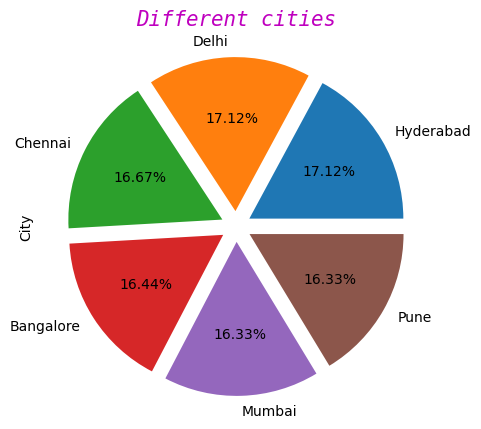

In [13]:
 # Pie Chart for City
plt.figure(figsize=(5,5))
df5['City'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%.2f%%',shadow=False)
plt.title('Different cities',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':15})
plt.show()

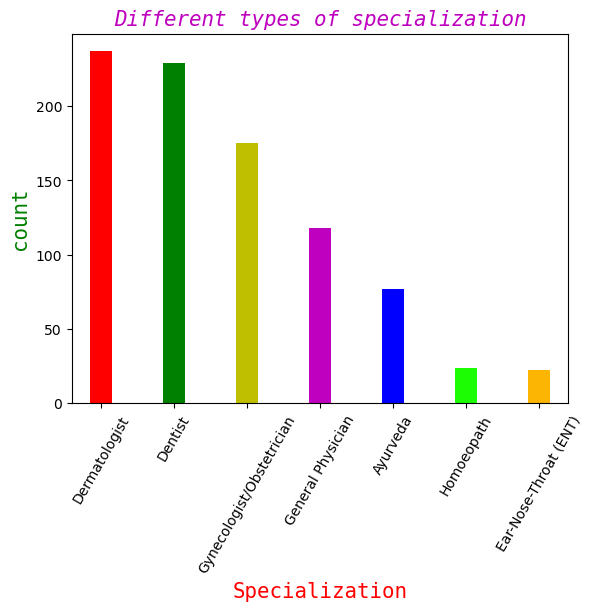

In [14]:
## bar plot for different cities
# Using Bar graph for Doctor_specialization
df5["Specialization"].value_counts().plot.bar(width=0.3,color=['r','g','y','m','b','#1cfc03','#fcb503'])
plt.xlabel('Specialization',fontdict={'family':'monospace','color':'r','size':15})
plt.ylabel('count',fontdict={'family':'monospace','color':'green','size':15})
plt.title('Different types of specialization',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':15})
plt.xticks(rotation = 60)
plt.show()

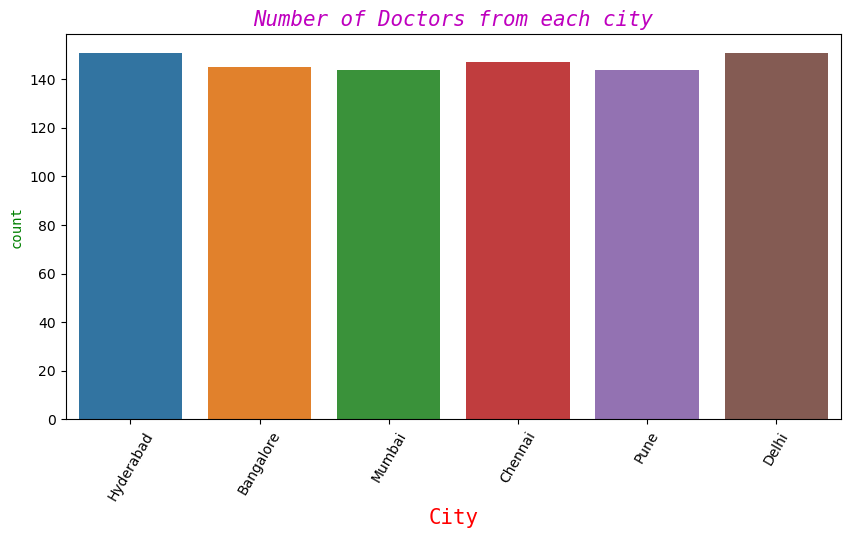

In [15]:
# using countplot for displaying city wise doctor specilizations 
plt.figure(figsize=(10,5)) 
sns.countplot(x='City',data=df5) 
plt.title('Number of Doctors from each city',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':15})  
plt.ylabel('count',fontdict={'family':'monospace','color':'green','size':10}) 
plt.xlabel('City',fontdict={'family':'monospace','color':'r','size':15}) 
plt.xticks(rotation = 60)  
plt.show() 

In [16]:
## kde plot for consultation_Fees

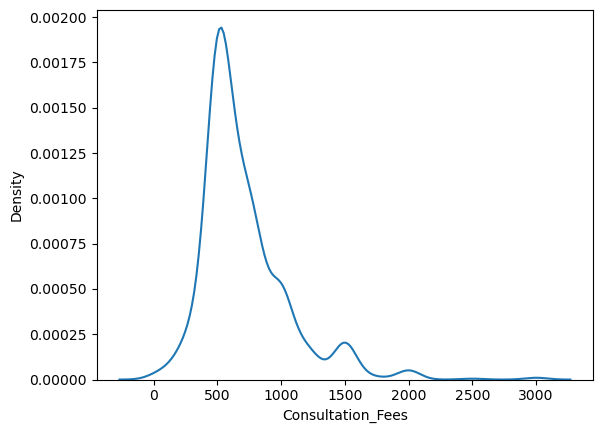

In [17]:
sns.kdeplot(df5['Consultation_Fees'])
plt.show()

In [18]:
#################

In [19]:
# finding the outliers
Q1,Q2,Q3=df5['Consultation_Fees'].quantile([0.25,0.5,0.75])
print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR
print(IQR, UL, LL)

500.0 600.0 800.0
300.0 1250.0 50.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


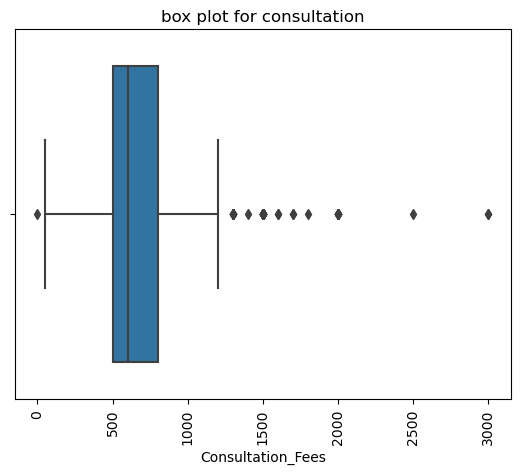

In [20]:
sns.boxplot(df5['Consultation_Fees'])
plt.title('box plot for consultation')
#plt.xlabel('City')
#plt.ylabel('Consultation_Fees')
plt.xticks(rotation=90)
plt.show()

In [21]:
#finding the outliers

df5.loc[(df5['Consultation_Fees']> UL) | (df5['Consultation_Fees'] < LL)]

,Doctor_Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations
21,Dr. Sonia Tekchandani,Dermatologist,37,Tender Skin International,Malad West,Mumbai,2000,93.0
26,Dr. Kaleem Khan,Dermatologist,14,Surya Hospitals,Santacruz West,Mumbai,1500,97.0
27,Dr. Smriti Naswa Singh,Dermatologist,14,Fortis Hospital,Mulund West,Mumbai,1500,100.0
51,Dr. Hemant Sharma,Dermatologist,48,BLK-Max Super Speciality Hospital,Pusa Road,Delhi,1500,95.0
53,Dr. Tanvi Pal,Dermatologist,19,BLK-Max Super Speciality Hospital,Pusa Road,Delhi,1500,97.0
...,...,...,...,...,...,...,...,...
836,Dr. Hemlata Hardasani,Gynecologist/Obstetrician,27,Mothers Care Clinic,Andheri West,Mumbai,1500,99.0
837,Dr. Shilpa Bansal Agrawal,Gynecologist/Obstetrician,18,Harleys Cosmetic & Women Clinic,Andheri West,Mumbai,1500,99.0
838,Dr. Shubhada Sanjiv Khandeparkar,Gynecologist/Obstetrician,44,Dr. Khandeparkar's Infertility and IVF Centre,Dadar East,Mumbai,2500,93.0
865,Dr. Vaishali Sharma,Gynecologist/Obstetrician,18,Dr Vaishali Sharma MD( AIIMS) Gynaec Clinic,Panchsheel Park,Delhi,3000,99.0


In [22]:
##triming -delete the outliers

new_df=df5.loc[(df5['Consultation_Fees']< UL) & (df5['Consultation_Fees'] > LL)]
print("before removing outliers: ", len(df5))
print("after removing outliers: ", len(new_df))
print("outliers: ",len(df5)-len(new_df))

before removing outliers:  882
after removing outliers:  815
outliers:  67


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Consultation_Fees'>

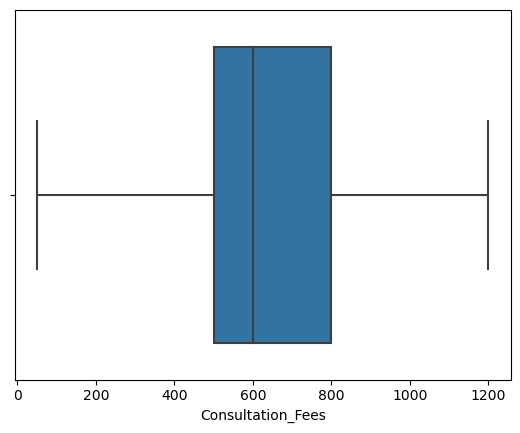

In [23]:
sns.boxplot(new_df['Consultation_Fees'])

## Bivaraint Analysis

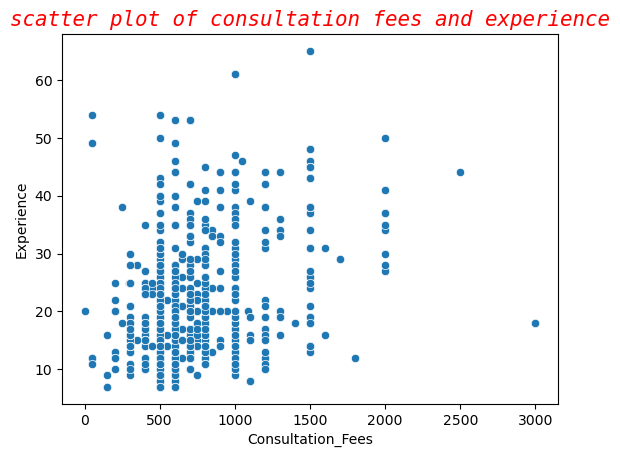

In [24]:
# numerical vs numerical
sns.scatterplot(x='Consultation_Fees',y='Experience',data=df5)
plt.title('scatter plot of consultation fees and experience',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'r','size':15})
plt.show()

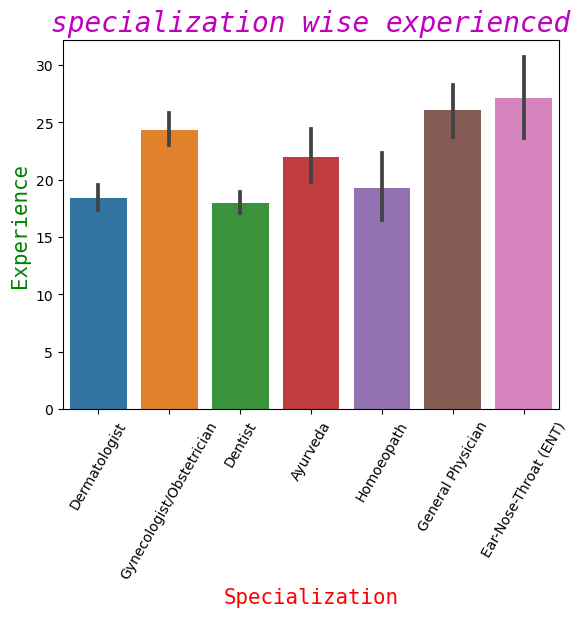

In [25]:
# using barplot for displaying specialization vs  doctors experience
# categorical vs numerical
sns.barplot(x="Specialization",y="Experience",data=df5)
plt.xticks(rotation=60)
plt.ylabel('Experience',fontdict={'family':'monospace','color':'green','size':15}) 
plt.xlabel('Specialization',fontdict={'family':'monospace','color':'r','size':15}) 
plt.title('specialization wise experienced',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show() 

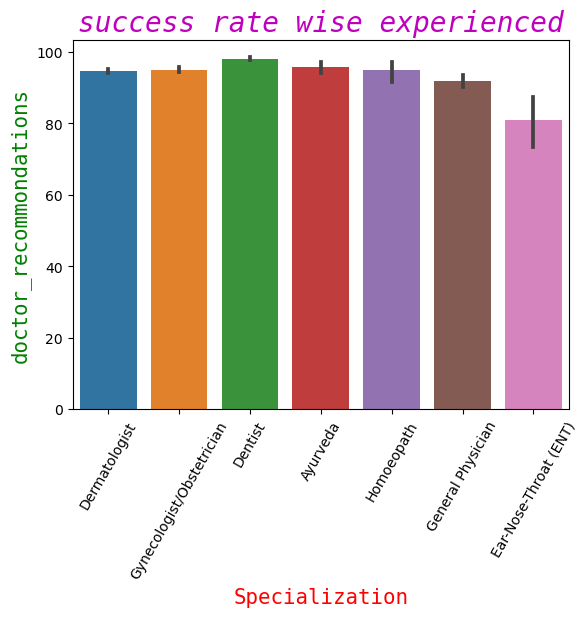

In [28]:
# using barplot for displaying specialization vs  doctors experience
# categorical vs numerical
sns.barplot(x="Specialization",y="Doctor_recommondations",data=df5)
plt.xticks(rotation=60)
plt.ylabel('doctor_recommondations',fontdict={'family':'monospace','color':'green','size':15}) 
plt.xlabel('Specialization',fontdict={'family':'monospace','color':'r','size':15}) 
plt.title('success rate wise experienced',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show() 

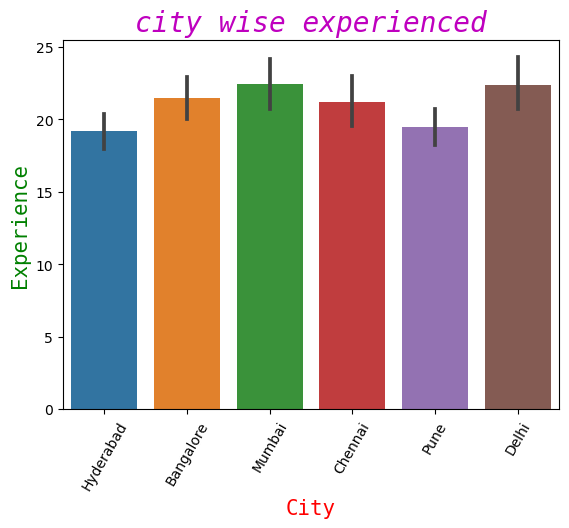

In [29]:
# using barplot for displaying citywise doctors experience
# categorical vs numerical
sns.barplot(x="City",y="Experience",data=df5)
plt.xticks(rotation=60)
plt.ylabel('Experience',fontdict={'family':'monospace','color':'green','size':15}) 
plt.xlabel('City',fontdict={'family':'monospace','color':'r','size':15}) 
plt.title('city wise experienced',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show() 

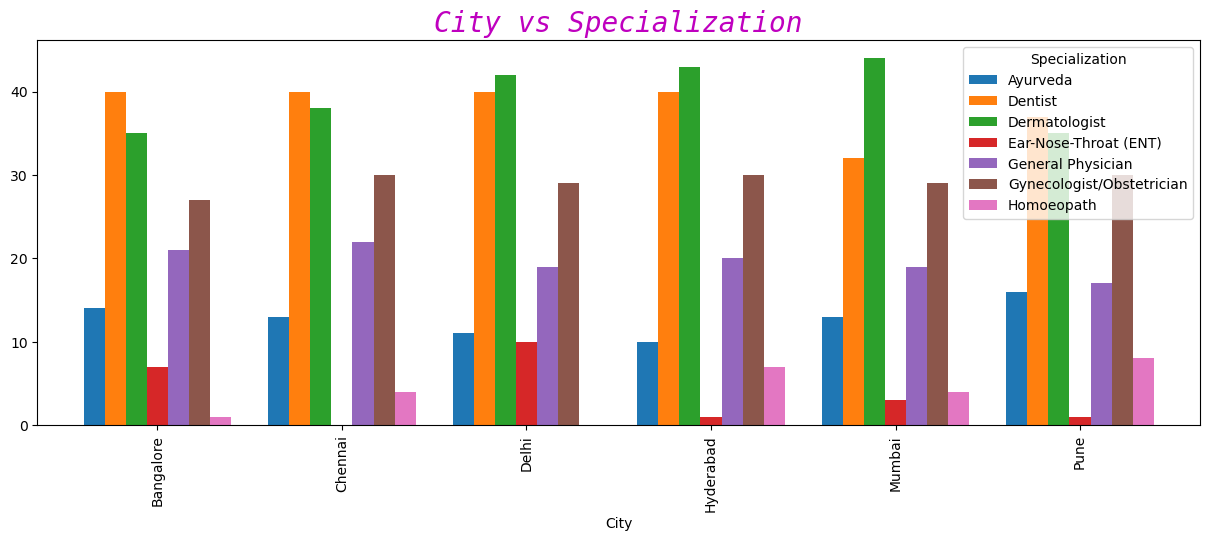

In [32]:
# using crosstab for displaying citywise specializations
#categorical vs categorical
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(df5["City"],df5["Specialization"]).plot(kind="bar",ax=ax,width=0.8)
plt.title('City vs Specialization',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show()

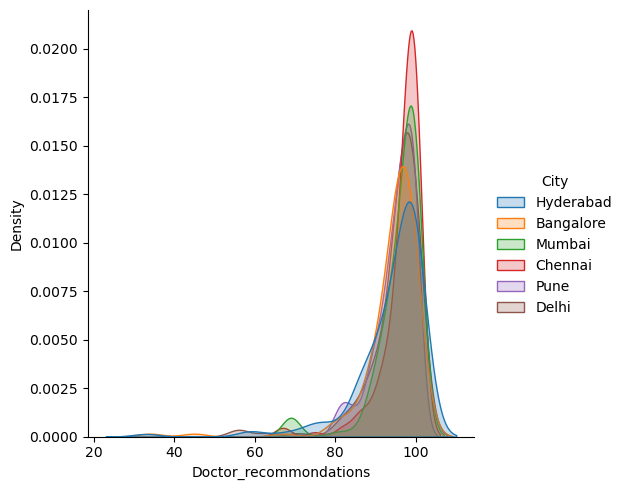

In [33]:
# diplot for displaying citywise doctors sucessrate 
sns.displot(df5,x="Doctor_recommondations",hue="City",kind="kde",fill=True) 
plt.show()

# multivariate analysis

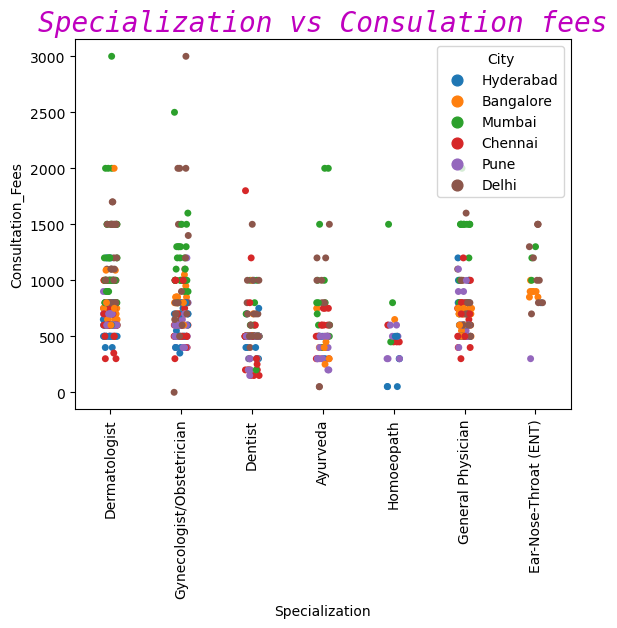

In [34]:
### code here
# Numeric to Numeric to Categorical Scatter plot
sns.stripplot(x='Specialization',y='Consultation_Fees',hue='City',data=df5)
plt.xticks(rotation=90)
plt.title('Specialization vs Consulation fees',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show() 

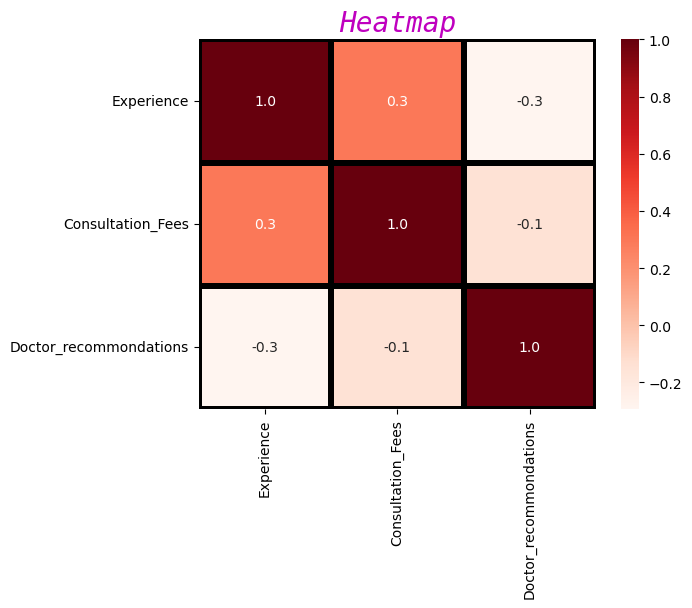

In [35]:
# Heatmap plot
sns.heatmap(df5.corr(),annot=True,cmap="Reds",linecolor="black",linewidth=4,fmt='.1f')
plt.title('Heatmap',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show()

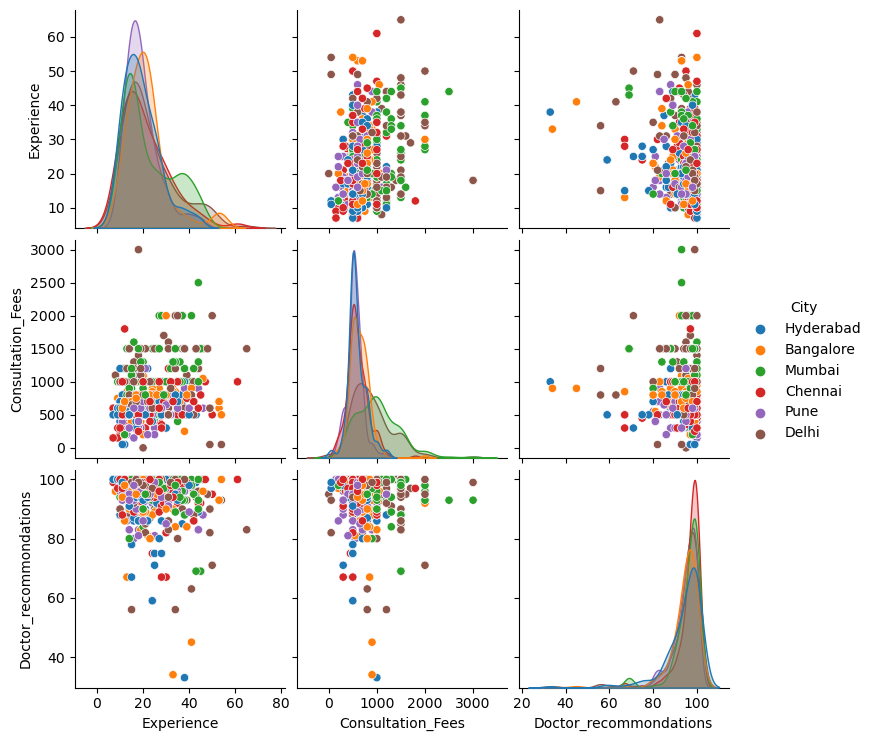

In [36]:
#pair plot

sns.pairplot(df5,hue='City')
plt.show()

### Conclusions

1. As we observe, dentists are more in number in Bangalore, Chennai and Pune cities.

2. In Delhi, Hyderabad and Mumbai cities Dermatologists are more in number.

3. ENT Specialists has maximum experience than any other Specialists.

4. Most of the Doctors are in Delhi and Hyderabad with 17.12% tops in Doctors list.

5. Dentist has more percentage of recommendation when compared with other Specialists.